In [2]:
import matplotlib.pyplot as plt
import MDAnalysis as mda
import numpy as np
from matplotlib.markers import MarkerStyle as markerstyle
import math
from scipy.interpolate import griddata
import pandas
from scipy import constants
import matplotlib.patches as patches
import matplotlib.cm as cm
import seaborn as sns

In [3]:
dist_file = "../3D_Martini3/COM_data_COMPLETE.txt"
dist_data = pandas.read_csv(dist_file,comment='#',sep='\t',dtype=np.float64)   #Distance file
#Remove duplicates 
dist_data3D = dist_data.drop_duplicates(subset=['Timestep'],ignore_index=True)

In [4]:
com_file = "../2D_Martini3/Filtered_DeltaZ.dat"
dz_data = pandas.read_csv(com_file,comment='#',sep='\t')

timesteps_array = dz_data['Timestep']/1e6
mask1 = (timesteps_array > 33.0) & (timesteps_array < 66.0)
mask2 = (timesteps_array > 95.2) & (timesteps_array < 97.8)
mask3 = (timesteps_array > 101.95) & (timesteps_array < 103.3)
mask4 = (timesteps_array > 127.6) & (timesteps_array < 128.5)
mask5 = (timesteps_array > 139) & (timesteps_array < 142.5)

mask = mask1 | mask2 | mask3 | mask4 | mask5

dist_data2D = dz_data[~mask]


In [5]:
dist_file = "../Pseudo_Mem/COM_data.txt"
dist_data = pandas.read_csv(dist_file,comment='#',sep='\t',dtype=np.float64)   #Distance file
#Remove duplicates 
dist_data_pseudo = dist_data.drop_duplicates(subset=['Timestep'],ignore_index=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

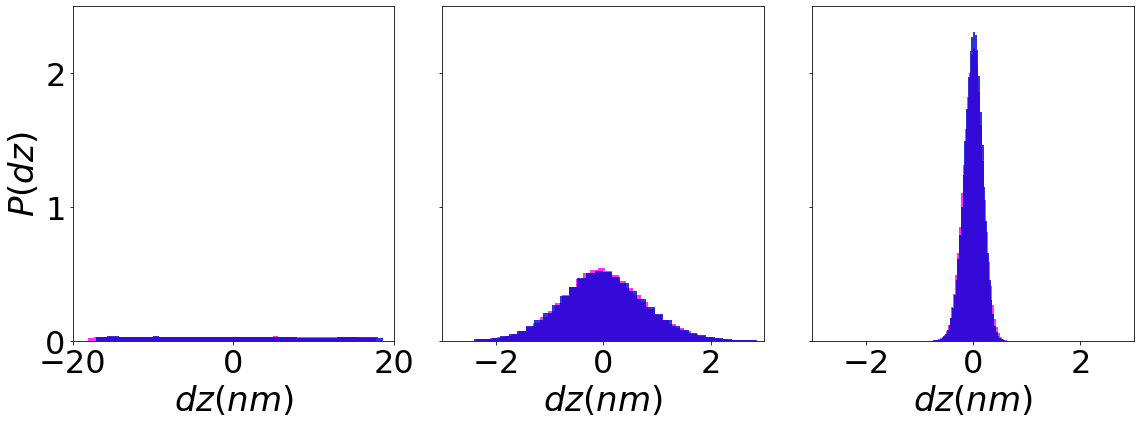

In [8]:
fig,ax = plt.subplots(1,3,figsize=(16,6),sharey=True)

nbins=50
al=0.8
f_size=34
t_size = 32
leg_size=20

cl2 = 'mediumblue'
cl1='magenta'

meanA_3D = dist_data3D['COMz_chainA'].mean()
meanB_3D = dist_data3D['COMz_chainB'].mean()

meanA_2D = dist_data2D['dz_xy_Aupp'].mean()
meanB_2D = dist_data2D['dz_xy_Bupp'].mean()

meanA_pseudo = dist_data_pseudo['COMz_chainA'].mean()
meanB_pseudo = dist_data_pseudo['COMz_chainB'].mean()

#Plot 3D data
ax[0].hist(dist_data3D['COMz_chainA']-meanA_3D,bins=nbins,density=True,alpha=al,color=cl1)
ax[0].hist(dist_data3D['COMz_chainB']-meanB_3D,bins=nbins,density=True,alpha=al,color=cl2)
ax[0].ticklabel_format(axis='y',style='sci',scilimits=(-1,0))
ax[0].set_yticks([0,0.015,0.03])

ax[1].hist(dist_data2D['dz_xy_Aupp']-meanA_2D,bins=nbins,density=True,alpha=al,color=cl1)
ax[1].hist(dist_data2D['dz_xy_Bupp']-meanB_2D,bins=nbins,density=True,alpha=al,color=cl2)
ax[1].set_yticks([0,0.2,0.4])

ax[2].hist(dist_data_pseudo['COMz_chainA']-meanA_pseudo,bins=nbins,density=True,alpha=al,color=cl1,label='chainA');
ax[2].hist(dist_data_pseudo['COMz_chainB']-meanB_pseudo,bins=nbins,density=True,alpha=al,color=cl2,label='chainB');
ax[2].set_yticks([0,1,2])
# ax[2].legend(fontsize=leg_size,frameon=False,loc='upper right')

ax[0].set_ylabel(r'$ P(dz)$',fontsize=f_size)
for ax_ in ax:
    ax_.set_xlabel(r'$ dz (nm)$',fontsize=f_size)
    # ax_.set_ylabel(r'$ P(\Theta)$',fontsize=f_size)
    ax_.tick_params(axis='both',labelsize=t_size)
    # ax_.set_xlim(-19,19)
    # ax_.set_xticks([-20,-10,0,10,20])
    # ax_.set_xticklabels([r'$-\pi/{2}$',r'$-\pi/{4}$',r'$0$',r'$\pi/{4}$',r'$\pi/{2}$'])
    ax_.set_yticks([0,1,2])
    ax_.set_ylim(0,2.5)


ax[0].set_xlim(-20,20)
ax[1].set_xlim(-3.0,3.0)
ax[2].set_xlim(-3.0,3.0)
fig.tight_layout()

plt.savefig('dz_FINAL.eps', dpi=600,format='eps',transparent=True)
plt.savefig('dz_FINAL.png', dpi=600,format='png',transparent=True)


In [6]:
print(meanA_pseudo,meanB_pseudo)

19.3483756278945 19.678381278156557


Text(0, 0.5, 'dz (nm)')

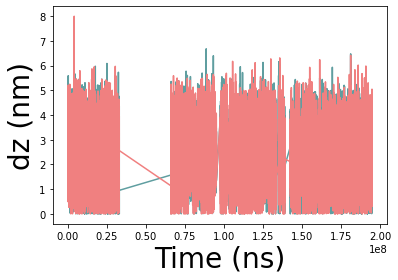

In [7]:
fig,ax = plt.subplots()

ax.plot(dist_data2D['Timestep'],dist_data2D['dz_xy_Aupp'],color=cl1,label='chainA')
ax.plot(dist_data2D['Timestep'],dist_data2D['dz_xy_Bupp'],color=cl2,label='chainB')

ax.set_xlabel('Time (ns)',fontsize=f_size)
ax.set_ylabel("dz (nm)",fontsize=f_size)